# IMDb Rating Prediction from a data set of Movies

In [125]:
#Import the Libraries
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import missingno as msno 
import seaborn as sns
plt.style.use('seaborn-whitegrid')

from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder

In [126]:
#Load the Dataset
df_movies = pd.read_csv("MoviesOnStreamingPlatforms_updated.csv", index_col="ID")
df_movies.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
ID,,,,,,,,,,,,,,,,
1,0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
2,1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
3,2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
4,3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
5,4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [127]:
#Remove "Unnamed" 
df_movies=df_movies.drop("Unnamed: 0",axis=1)
df_movies.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
ID,,,,,,,,,,,,,,,
1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [128]:
#Description overview of the data
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16744 entries, 1 to 16744
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            16744 non-null  object 
 1   Year             16744 non-null  int64  
 2   Age              7354 non-null   object 
 3   IMDb             16173 non-null  float64
 4   Rotten Tomatoes  5158 non-null   object 
 5   Netflix          16744 non-null  int64  
 6   Hulu             16744 non-null  int64  
 7   Prime Video      16744 non-null  int64  
 8   Disney+          16744 non-null  int64  
 9   Type             16744 non-null  int64  
 10  Directors        16018 non-null  object 
 11  Genres           16469 non-null  object 
 12  Country          16309 non-null  object 
 13  Language         16145 non-null  object 
 14  Runtime          16152 non-null  float64
dtypes: float64(2), int64(6), object(7)
memory usage: 2.0+ MB


In [129]:
#Check for total no.of null values in each column 
df_movies.isna().sum()

Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            726
Genres               275
Country              435
Language             599
Runtime              592
dtype: int64

In [130]:
#Removing the Target value
df_movies = df_movies[df_movies['IMDb'].notna()]

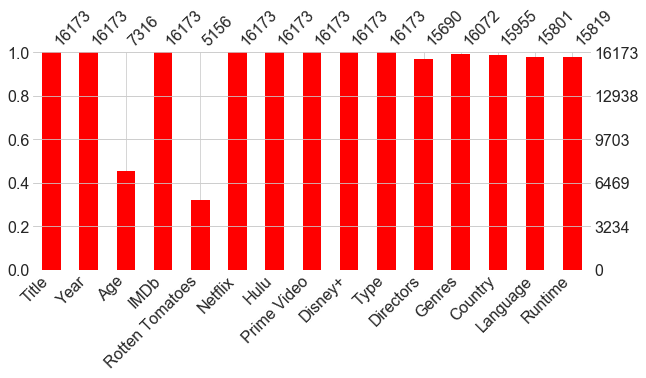

In [131]:
#Visualizing the amount of missing data
msno.bar(df_movies ,color='red', figsize=(10, 4))

In [132]:
#Dropping "Rotten Tomatoes" for its excessively low data 
df_movies = df_movies.drop(['Rotten Tomatoes'], axis=1)

#"Title" and "Type" are dropped as it is irrelevant for our prediction.
df_movies = df_movies.drop(['Title','Type'], axis=1)
df_movies.isna().sum()

Year              0
Age            8857
IMDb              0
Netflix           0
Hulu              0
Prime Video       0
Disney+           0
Directors       483
Genres          101
Country         218
Language        372
Runtime         354
dtype: int64

In [133]:
#Checking unique values in "Age" 
df_movies['Age'].unique()

array(['13+', '18+', '7+', nan, 'all', '16+'], dtype=object)

In [134]:
#Imputing null values in "Age" with "all"
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value="all")
df_movies["Age"] = imputer.fit_transform(df_movies[["Age"]]).ravel()

df_movies.isna().sum()

Year             0
Age              0
IMDb             0
Netflix          0
Hulu             0
Prime Video      0
Disney+          0
Directors      483
Genres         101
Country        218
Language       372
Runtime        354
dtype: int64

In [135]:
#Dropping all the rows(entries) where there are celss with no data 
df_movies.dropna(axis=0, how='any',inplace=True)

df_movies.isna().sum()

Year           0
Age            0
IMDb           0
Netflix        0
Hulu           0
Prime Video    0
Disney+        0
Directors      0
Genres         0
Country        0
Language       0
Runtime        0
dtype: int64

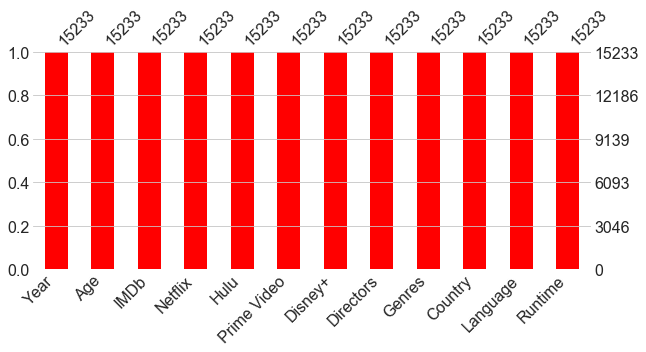

In [136]:
#Visualizing if there is anymore missing data or not
msno.bar(df_movies ,color='red', figsize=(10, 4))

In [137]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15233 entries, 1 to 16741
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         15233 non-null  int64  
 1   Age          15233 non-null  object 
 2   IMDb         15233 non-null  float64
 3   Netflix      15233 non-null  int64  
 4   Hulu         15233 non-null  int64  
 5   Prime Video  15233 non-null  int64  
 6   Disney+      15233 non-null  int64  
 7   Directors    15233 non-null  object 
 8   Genres       15233 non-null  object 
 9   Country      15233 non-null  object 
 10  Language     15233 non-null  object 
 11  Runtime      15233 non-null  float64
dtypes: float64(2), int64(5), object(5)
memory usage: 1.5+ MB


In [138]:
# Choose target and features
y = df_movies.IMDb

X = df_movies.drop(['IMDb'], axis=1)

#Split the data for train and test
X_train_full, X_test_full, y_train, y_test  = train_test_split(X, y,random_state = 0)

#List of Categorical colunmns to be used as features
cat_cols=["Age","Directors","Genres","Country","Language"]

#List of Numerical colunmns to be used as features
numerical_cols = ['Year','Runtime']

#Keep selected columns only
my_cols = numerical_cols + cat_cols 
X_train = X_train_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

In [139]:
#Viewing Test data
X_train.head()

,Year,Runtime,Age,Directors,Genres,Country,Language
ID,,,,,,,
13576,1972,88.0,18+,Vernon Zimmerman,"Action,Comedy,Drama,Sport",United States,English
9829,2011,93.0,13+,Nayan Padrai,"Comedy,Romance",United States,English
1256,2020,104.0,all,William Wyler,"Drama,Romance",United States,"English,French"
9800,2017,149.0,all,Boyapati Srinu,"Action,Romance",India,Telugu
11212,1941,66.0,all,Howard Bretherton,"Action,Adventure,Western",United States,English


In [140]:
#Viewing Test data
X_test.head()

,Year,Runtime,Age,Directors,Genres,Country,Language
ID,,,,,,,
8874,2016,90.0,all,Ross Kohn,Thriller,United States,English
12421,2016,87.0,all,Melissa Finell,Comedy,United States,English
8191,2018,79.0,all,Svend Ploug Johansen,Sci-Fi,United States,"English,Danish"
12796,2017,120.0,18+,Christopher Compton,"Action,Adventure,Drama",United States,English
4721,2018,136.0,all,Zhangke Jia,"Crime,Drama,Romance","China,France,Japan","Chinese,Mandarin"


In [141]:
#Copying the data to prevent change in original datset
label_X_train = X_train.copy()
label_X_test = X_test.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in cat_cols:
    label_encoder.fit(pd.concat([label_X_train[col], label_X_test[col]], axis=0, sort=False))
    label_X_train[col] = label_encoder.transform(label_X_train[col])
    label_X_test[col] = label_encoder.transform(label_X_test[col])

In [142]:
# Define the models
model_1 = RandomForestRegressor(n_estimators=50, random_state=1)
model_2 = RandomForestRegressor(n_estimators=100, random_state=1)
model_3 = RandomForestRegressor(n_estimators=100, criterion='mae', random_state=1)
model_4 = RandomForestRegressor(n_estimators=200, min_samples_split=20, random_state=1)
model_5 = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=1)

#List of models
models = [model_1, model_2, model_3, model_4, model_5]

In [143]:
# Function for comparing different models
def score_model(model, X_t=label_X_train, X_v=label_X_test, y_t=y_train, y_v=y_test):
    model.fit(X_t, y_t)
    preds = model.predict(X_v)
    return mean_absolute_error(y_v, preds)

mae_scores=[]

for i in range(0, len(models)):
    mae = score_model(models[i])
    print("Model %d MAE: %f" % (i+1, mae))
    mae_scores.append(mae)

Model 1 MAE: 0.834292
Model 2 MAE: 0.831473
Model 3 MAE: 0.827311
Model 4 MAE: 0.812408
Model 5 MAE: 0.823902


In [145]:
best_score=min(mae_scores)
best_score

0.8124076242731043